In [2]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # Optional for interactive plots
import missingno as msno      # For missing data visualization
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

## EDA

In [3]:
# 2. Load Data
df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')
extra_df = pd.read_csv('../dataset/training_extra.csv') # Replace with your file
print(f"Data shape: {df.shape}")


Data shape: (300000, 11)


In [4]:
df = pd.concat([df, extra_df], axis=0, ignore_index=True)
df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [5]:

# 3. Basic Info
df.info()
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Brand                 object 
 2   Material              object 
 3   Size                  object 
 4   Compartments          float64
 5   Laptop Compartment    object 
 6   Waterproof            object 
 7   Style                 object 
 8   Color                 object 
 9   Weight Capacity (kg)  float64
 10  Price                 float64
dtypes: float64(3), int64(1), object(7)
memory usage: 335.2+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3994318.0,NaN,NaN,NaN,2182137.16219,1178057.976858,0.0,1198579.25,2197158.5,3195737.75,4194317.0
Brand,3867560,5,Under Armour,801035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Material,3883356,4,Polyester,1060882,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,3906533,3,Medium,1354487,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Compartments,3994318.0,NaN,NaN,NaN,5.43474,2.893043,1.0,3.0,5.0,8.0,10.0
Laptop Compartment,3895785,2,Yes,1972937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Waterproof,3899994,2,Yes,1969205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Style,3890138,3,Messenger,1329677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,3860701,6,Pink,688257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight Capacity (kg),3992510.0,NaN,NaN,NaN,18.010417,6.973969,5.0,12.068964,18.05436,23.987505,30.0


In [6]:

# 4. Missing Values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percent': missing_percent})
missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percent', ascending=False)


,Missing Values,Percent
Color,133617,3.345177
Brand,126758,3.173458
Material,110962,2.777996
Style,104180,2.608205
Laptop Compartment,98533,2.466829
Waterproof,94324,2.361454
Size,87785,2.197747
Weight Capacity (kg),1808,0.045264


<Axes: >

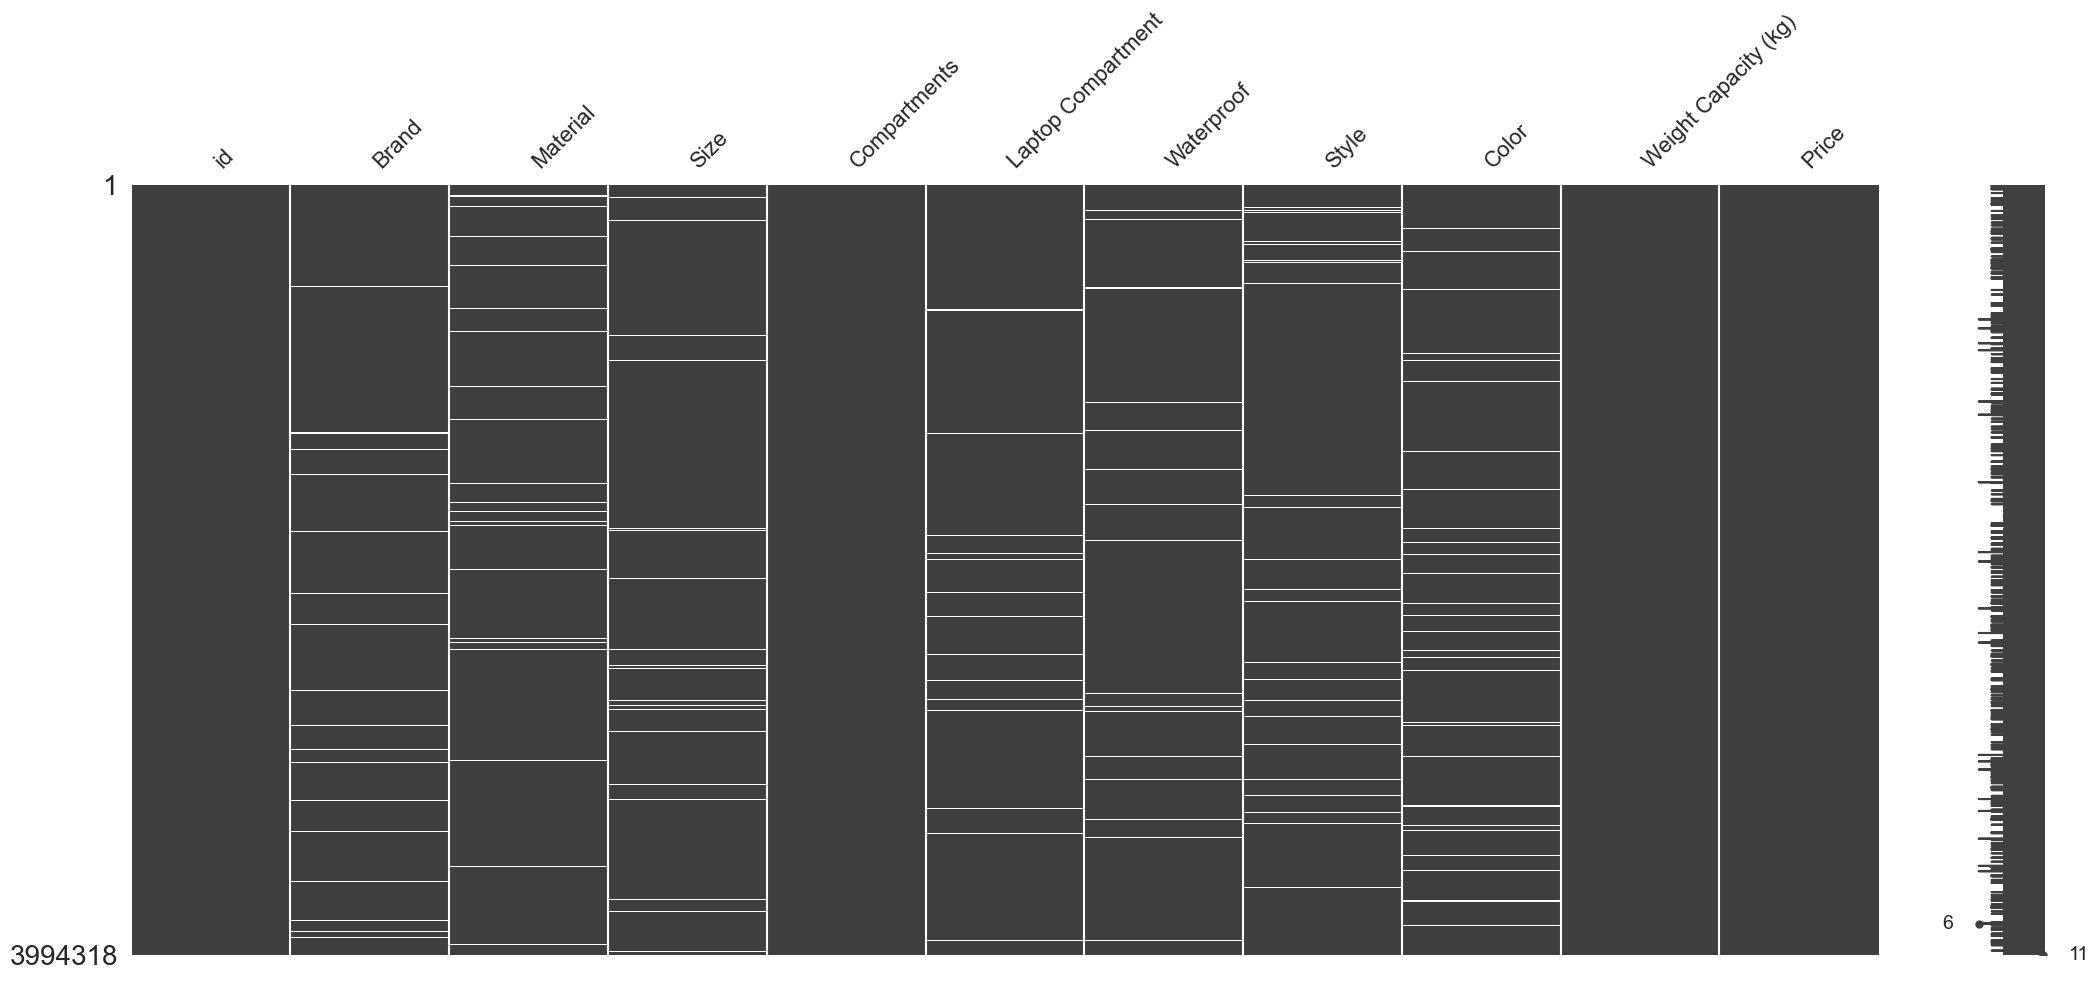

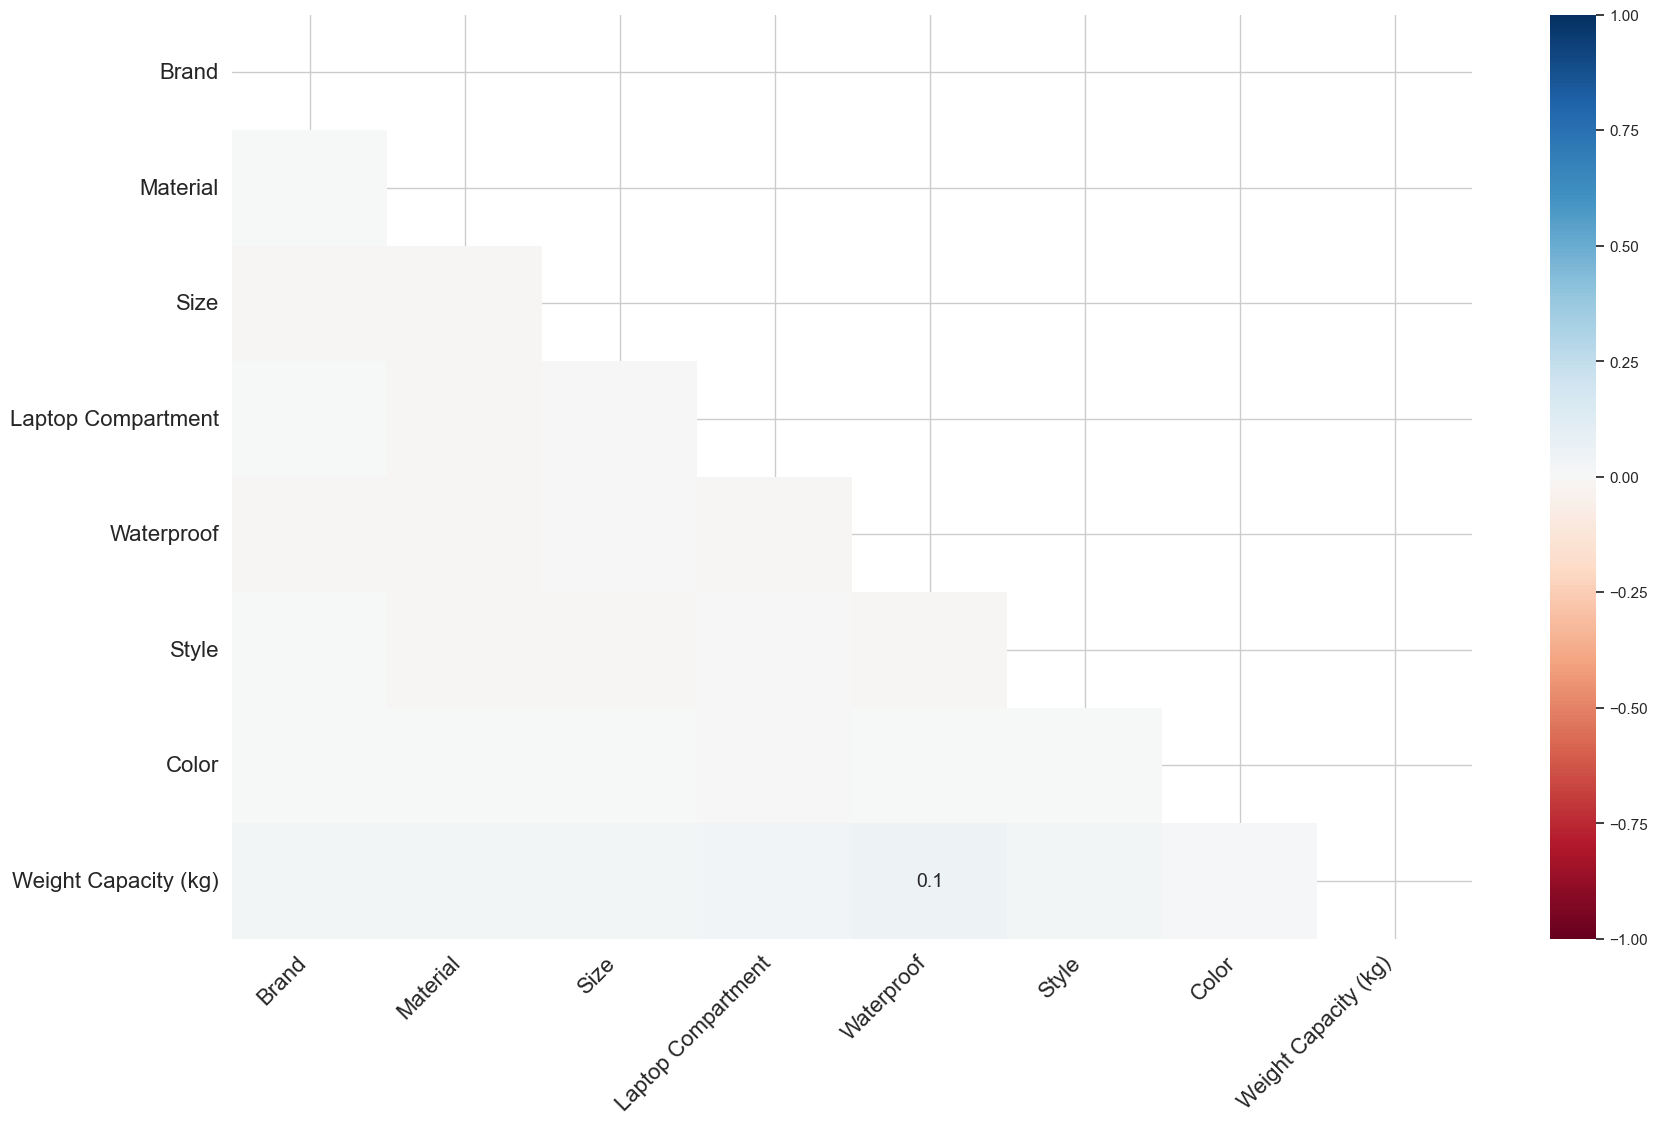

In [7]:

# Visualize missing data
msno.matrix(df)
msno.heatmap(df)


In [8]:

# 5. Duplicate Rows
print(f"Duplicate rows: {df.duplicated().sum()}")


Duplicate rows: 0


In [9]:

# 6. Data Types & Unique Values
df.dtypes
df.nunique()


id                      3994318
Brand                         5
Material                      4
Size                          3
Compartments                 10
Laptop Compartment            2
Waterproof                    2
Style                         3
Color                         6
Weight Capacity (kg)    1920345
Price                     48358
dtype: int64

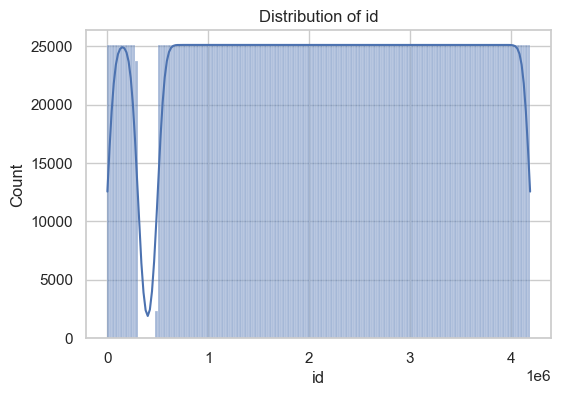

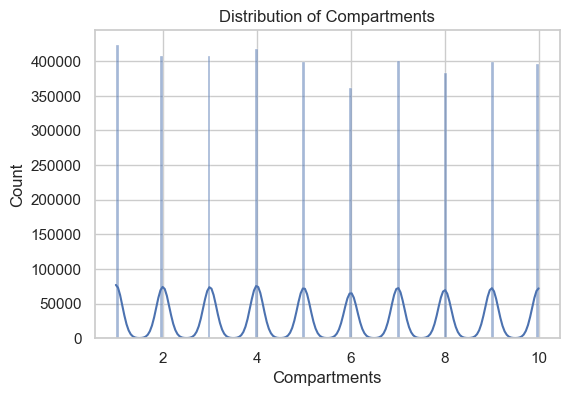

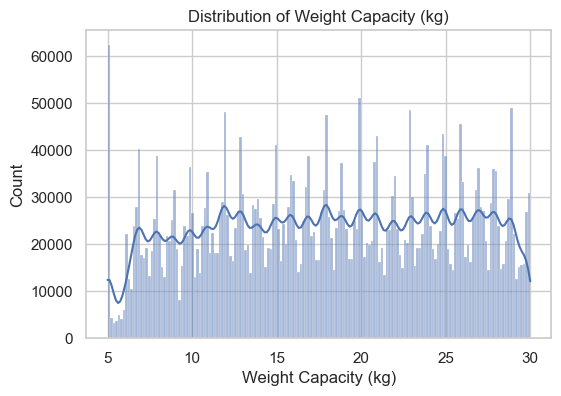

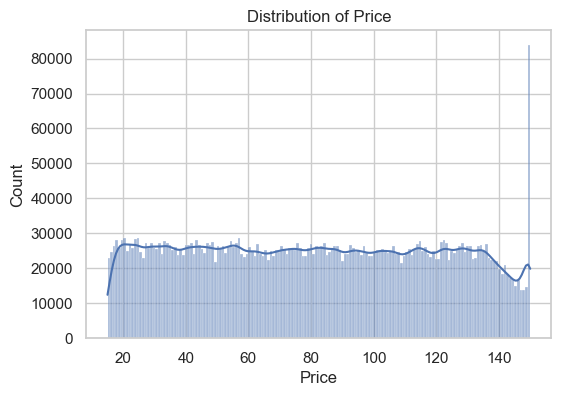

In [10]:

# 7. Univariate Analysis
# Numerical
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


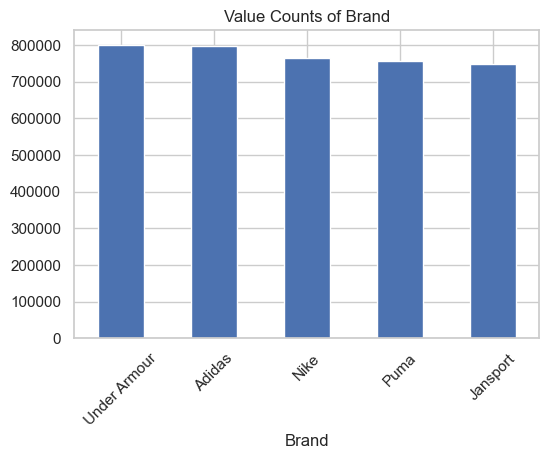

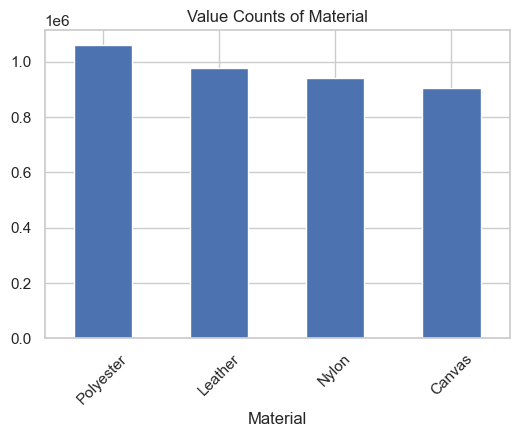

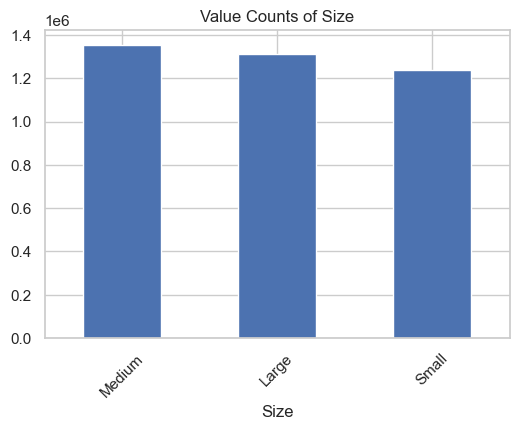

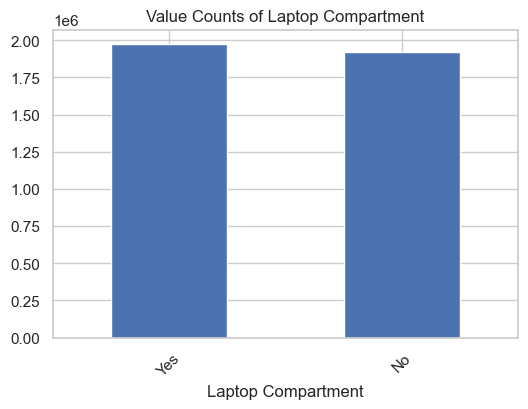

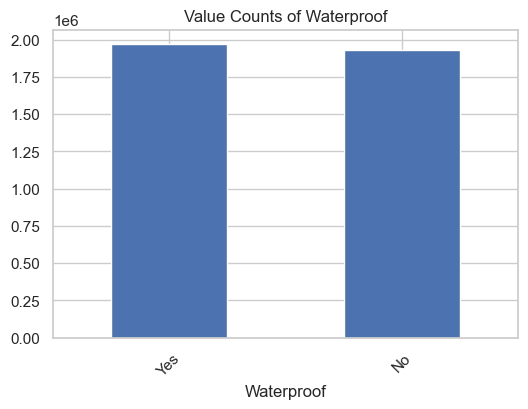

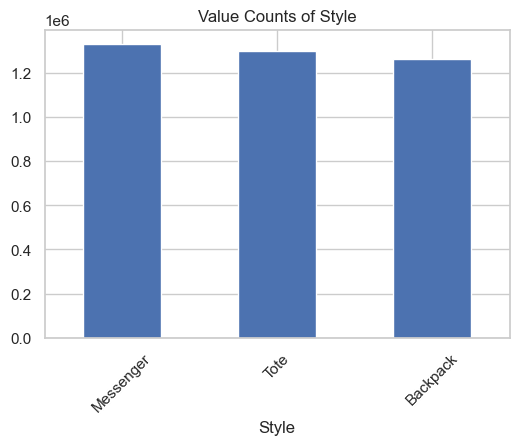

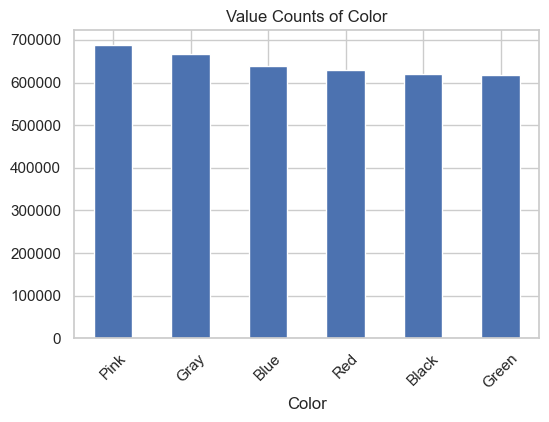

In [11]:

# Categorical
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Value Counts of {col}')
    plt.xticks(rotation=45)
    plt.show()


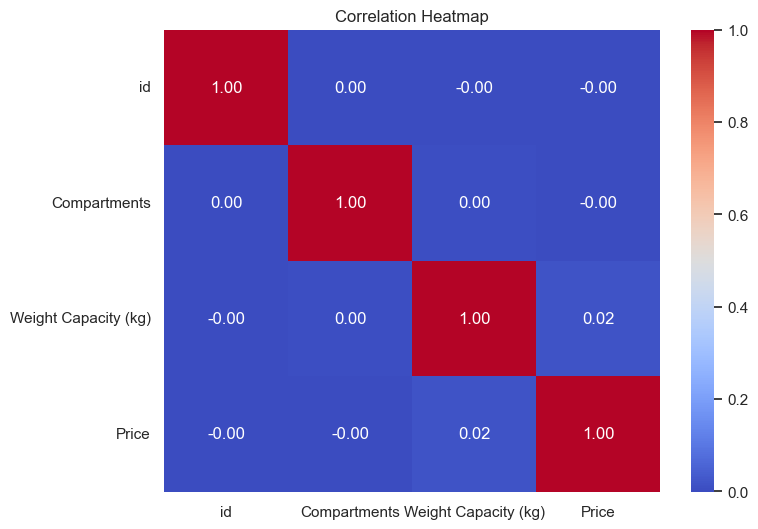

In [12]:

# 8. Bivariate Analysis
# Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


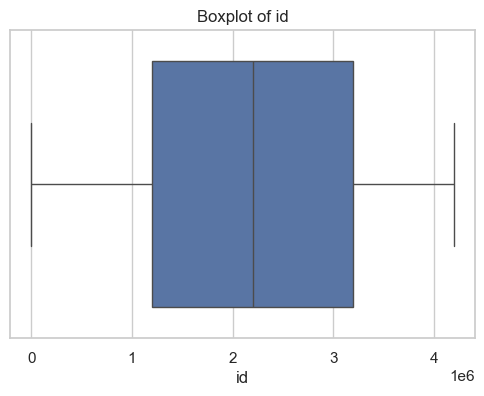

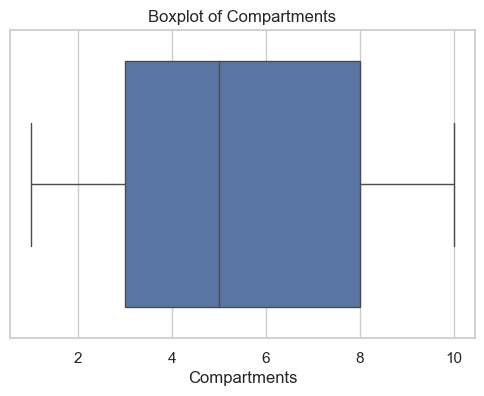

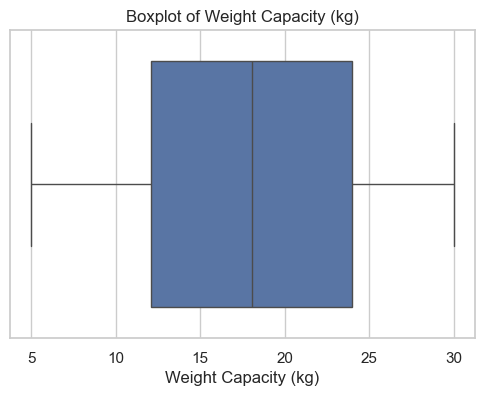

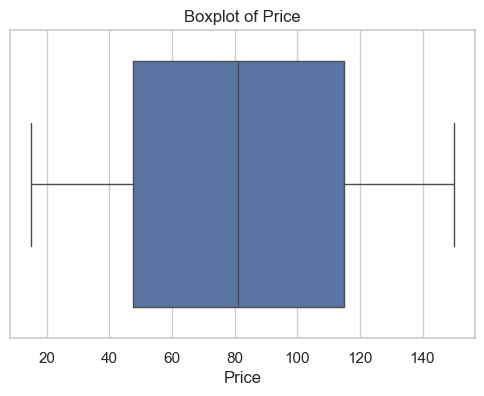

In [13]:

# 9. Outlier Detection
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


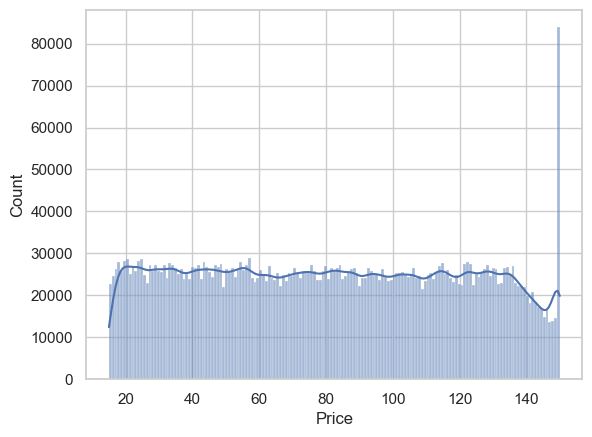

In [14]:

# 11. Target Distribution
target = "Price"
if target in df.columns:
    if df[target].dtype == 'object':
        df[target].value_counts().plot(kind='bar', title="Target Distribution")
    else:
        sns.histplot(df[target], kde=True)
    plt.show()


## Data Preprocessing

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RepeatedKFold

from sklearn.metrics import root_mean_squared_error, r2_score, roc_auc_score

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

from numpy import absolute

In [16]:
# Split train data
X = df.drop(columns=['Price', 'id'])
Y = df['Price']

In [17]:
# Get numerical columns automatically
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.difference(cat_cols).tolist()

# Numerical pipeline: impute missing with mean
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Categorical pipeline: impute with most frequent, then encode
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('encoder', OneHotEncoder())
])

# Column transformer: combine both pipelines
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, cat_cols)
])

# Final pipeline (can remove classifier if just preprocessing)
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
])

# Fit the pipeline
X_encoded = pipeline.fit_transform(X, Y)


In [18]:
# Separate training and testing data
x_train, x_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.3, random_state=42)

#### Model Training

##### XGBRegressor

In [19]:
#Define the model Multivariate Linear Regression
xgb = XGBRegressor(device="cuda",
    max_depth=5,
    n_estimators=2000,
    learning_rate=0.015,
    random_state=42)

# Train the model
model = xgb.fit(x_train, y_train)

In [ ]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(xgb,x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [21]:
#y-intercept of the model
model.intercept_

array([81.36234], dtype=float32)

In [22]:
preds = model.predict(x_test)

In [23]:
root_mean_squared_error(y_test, preds)

38.84872034517267

##### Multi Layer Perceptron Regressor

In [24]:
regr = MLPRegressor(random_state=1, max_iter=2000, tol=0.1)
regr.fit(x_train, y_train)

MLPRegressor(max_iter=2000, random_state=1, tol=0.1)

In [25]:
preds = regr.predict(x_test)

In [26]:
root_mean_squared_error(y_test, preds)

38.880388341539415

##### Linear Regression

In [27]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [28]:
preds = lr.predict(x_test)

In [29]:
root_mean_squared_error(y_test, preds)

38.88567943765832